In [18]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym import wrappers

In [19]:
env = gym.make("FrozenLake-v0")
env = wrappers.Monitor(env, 'f_lake_q_learning',force=True)

[2017-06-27 20:57:43,477] Making new env: FrozenLake-v0
[2017-06-27 20:57:43,483] Clearing 40 monitor files from previous run (because force=True was provided)


In [20]:
q = np.zeros(shape=(env.observation_space.n,env.action_space.n))
learning_rate = 0.7
discount = 0.9
epsilon = 0.3
num_episodes = 10000
reward_array = []

In [21]:
for i in range(0,num_episodes):
    state = env.reset()
    epsilon *= 0.999
    if epsilon<0.00001:
        epsilon = 0.0
    for j in range(0,10000):
        if np.random.uniform()>epsilon:
            action = np.argmax(q[state,:])
        else:
            action = np.random.randint(env.action_space.n)
        
        new_state,reward,done,_ = env.step(action)
        q[state,action] = q[state,action] + learning_rate*(reward + discount*np.max(q[new_state,:]) - q[state,action])

        if done:
            q[state,action] = q[state,action] + learning_rate*(reward + discount*np.max(q[new_state,:]) - q[state,action])
            reward_array.append(reward)
            break
        state = new_state
        
env.close()

[2017-06-27 20:57:44,782] Starting new video recorder writing to /media/jarvis/4C80CA6A80CA5A5A/projects/frozen_lake/f_lake_q_learning/openaigym.video.2.29930.video000000.json
[2017-06-27 20:57:44,791] Starting new video recorder writing to /media/jarvis/4C80CA6A80CA5A5A/projects/frozen_lake/f_lake_q_learning/openaigym.video.2.29930.video000001.json
[2017-06-27 20:57:44,810] Starting new video recorder writing to /media/jarvis/4C80CA6A80CA5A5A/projects/frozen_lake/f_lake_q_learning/openaigym.video.2.29930.video000008.json
[2017-06-27 20:57:44,838] Starting new video recorder writing to /media/jarvis/4C80CA6A80CA5A5A/projects/frozen_lake/f_lake_q_learning/openaigym.video.2.29930.video000027.json
[2017-06-27 20:57:44,889] Starting new video recorder writing to /media/jarvis/4C80CA6A80CA5A5A/projects/frozen_lake/f_lake_q_learning/openaigym.video.2.29930.video000064.json
[2017-06-27 20:57:44,942] Starting new video recorder writing to /media/jarvis/4C80CA6A80CA5A5A/projects/frozen_lake/f_l

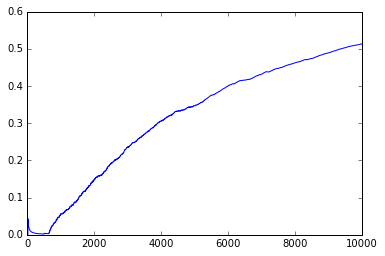

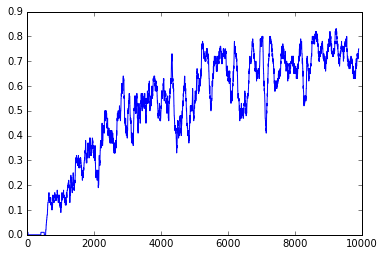

In [22]:
plot_reward = []
plot_reward.append(0)
for i in range(0,100):
    plot_reward[-1] += reward_array[i]
for i in range(0,len(reward_array)-100):
    plot_reward.append(plot_reward[-1]-reward_array[i]+reward_array[i+100])

for i in range(0,len(plot_reward)):
    plot_reward[i]/=100.0
    
for i in range(1,len(reward_array)):
    reward_array[i] += reward_array[i-1] 
for i in range(1,len(reward_array)):
    reward_array[i] /= (i+1)
    
plt.figure()
plt.plot(reward_array)
plt.show()
plt.figure()
plt.plot(plot_reward)
plt.show()

In [6]:
print np.mean(plot_reward)

0.0
